In [3]:
%matplotlib inline
import numpy as np

import qcodes as qc

from typing import List, Dict, Tuple, Any
import matplotlib.pyplot as plt
from matplotlib import ticker
import qcodes as qc
from qcodes import Parameter, new_experiment, Measurement, initialise_database, load_or_create_experiment, load_by_id,initialise_or_create_database_at, load_by_id
from qcodes.dataset.plotting import plot_dataset,plot_by_id

plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.rcParams['figure.dpi'] = 150


In [6]:
initialise_or_create_database_at('F:\QCoDeSLocal\SpinQubit\database\IMEC_AL809789_D18_D3SD4_T4.db') 


In [7]:
ds=load_by_id(187)
ds.get_parameter_data()

{'Ithaco': {'Ithaco': array([[-1.81557882e-11, -1.88307045e-11, -1.82782718e-11, ...,
          -1.80482952e-11, -1.79441923e-11, -1.77744081e-11],
         [-1.86317235e-11, -1.86536326e-11, -1.87289539e-11, ...,
          -1.79886562e-11, -1.78442405e-11, -1.82447854e-11],
         [-1.82165342e-11, -1.87340506e-11, -1.82687240e-11, ...,
          -1.81788735e-11, -1.76723347e-11, -1.78596231e-11],
         ...,
         [-1.72104212e-11, -1.72515873e-11, -8.91657380e-12, ...,
          -1.46498447e-11, -1.44317682e-11, -1.34451198e-11],
         [-1.69579590e-11, -7.51459766e-12, -1.07373139e-12, ...,
          -1.36331462e-11, -1.32675175e-11, -1.24050362e-11],
         [ 2.86100824e-12,  2.02751612e-12, -8.86484521e-12, ...,
          -1.16242874e-11, -1.07985903e-11, -8.72605670e-12]]),
  'qdac_A_BNC41': array([[0.5  , 0.5  , 0.5  , ..., 0.5  , 0.5  , 0.5  ],
         [0.505, 0.505, 0.505, ..., 0.505, 0.505, 0.505],
         [0.51 , 0.51 , 0.51 , ..., 0.51 , 0.51 , 0.51 ],
      

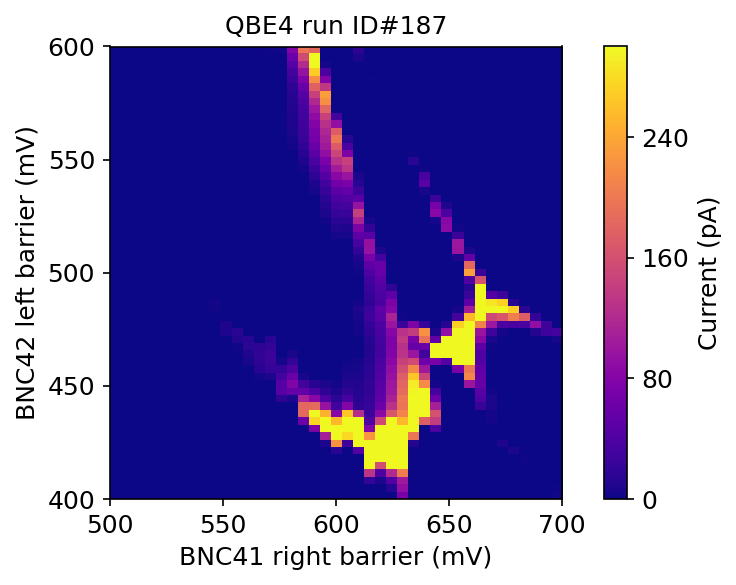

In [11]:
ds=load_by_id(187)

x=ds.get_parameter_data()['Ithaco']['qdac_A_BNC41'].flatten()
x = x*1000
y=ds.get_parameter_data()['Ithaco']['qdac_A_BNC42'].flatten()
y = y*1000
z=ds.get_parameter_data()['Ithaco']['Ithaco']
z = z*1e12

z=z.reshape(41,61)
z = z.transpose()
c = plt.imshow(z,origin='lower',cmap = 'plasma', extent=(min(x),max(x),min(y),max(y)),aspect='1', vmin=0,vmax=300)

cb = plt.colorbar(c)
cb.set_label(label='Current (pA)', size='12')
cb.ax.tick_params(labelsize='12')

tick_locator = ticker.MaxNLocator(nbins=4)
cb.locator = tick_locator
cb.update_ticks()


plt.xlabel('BNC41 right barrier (mV)', size = 12)
plt.ylabel('BNC42 left barrier (mV)',size = 12)
plt.title( f"QBE4 run ID#{ds.captured_run_id}")
plt.tick_params(labelsize= 12)
plt.tight_layout()
plt.locator_params(axis="y", nbins=4)
plt.locator_params(axis="x", nbins=4)


plt.savefig(f"{ds.captured_run_id}.pdf")

([<AxesSubplot:title={'center':'Run #187, Experiment T4 - forming a dot (QBE4)'}, xlabel='BNC41 (mV)', ylabel='BNC42 (mV)'>],
 [<matplotlib.colorbar.Colorbar at 0x1e087c32280>])

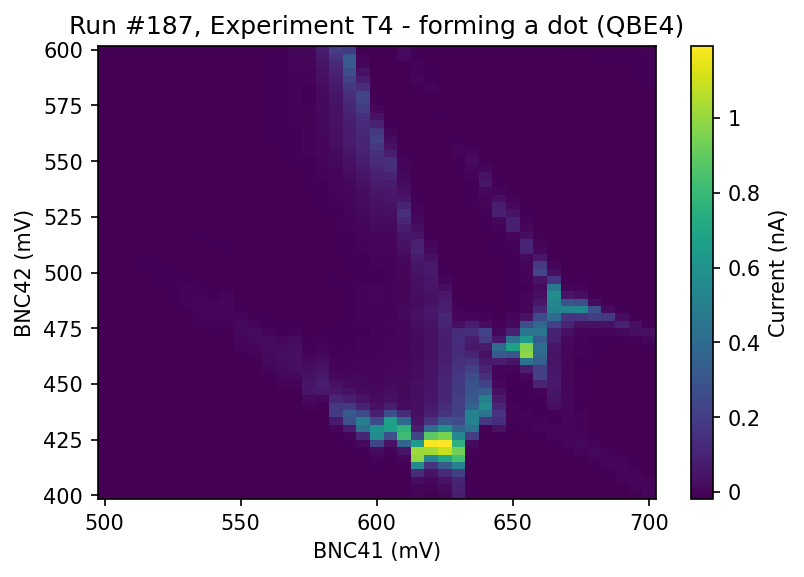

In [9]:
plot_by_id(187)